<a href="https://www.kaggle.com/code/zukhrakhongulomova/mobilenet-with-keras?scriptVersionId=160330551" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# MobileNet with Keras

### Notebook Imports

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 1s 0us/step


In [4]:
def prepare_image(file):
    img = image.load_img(file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

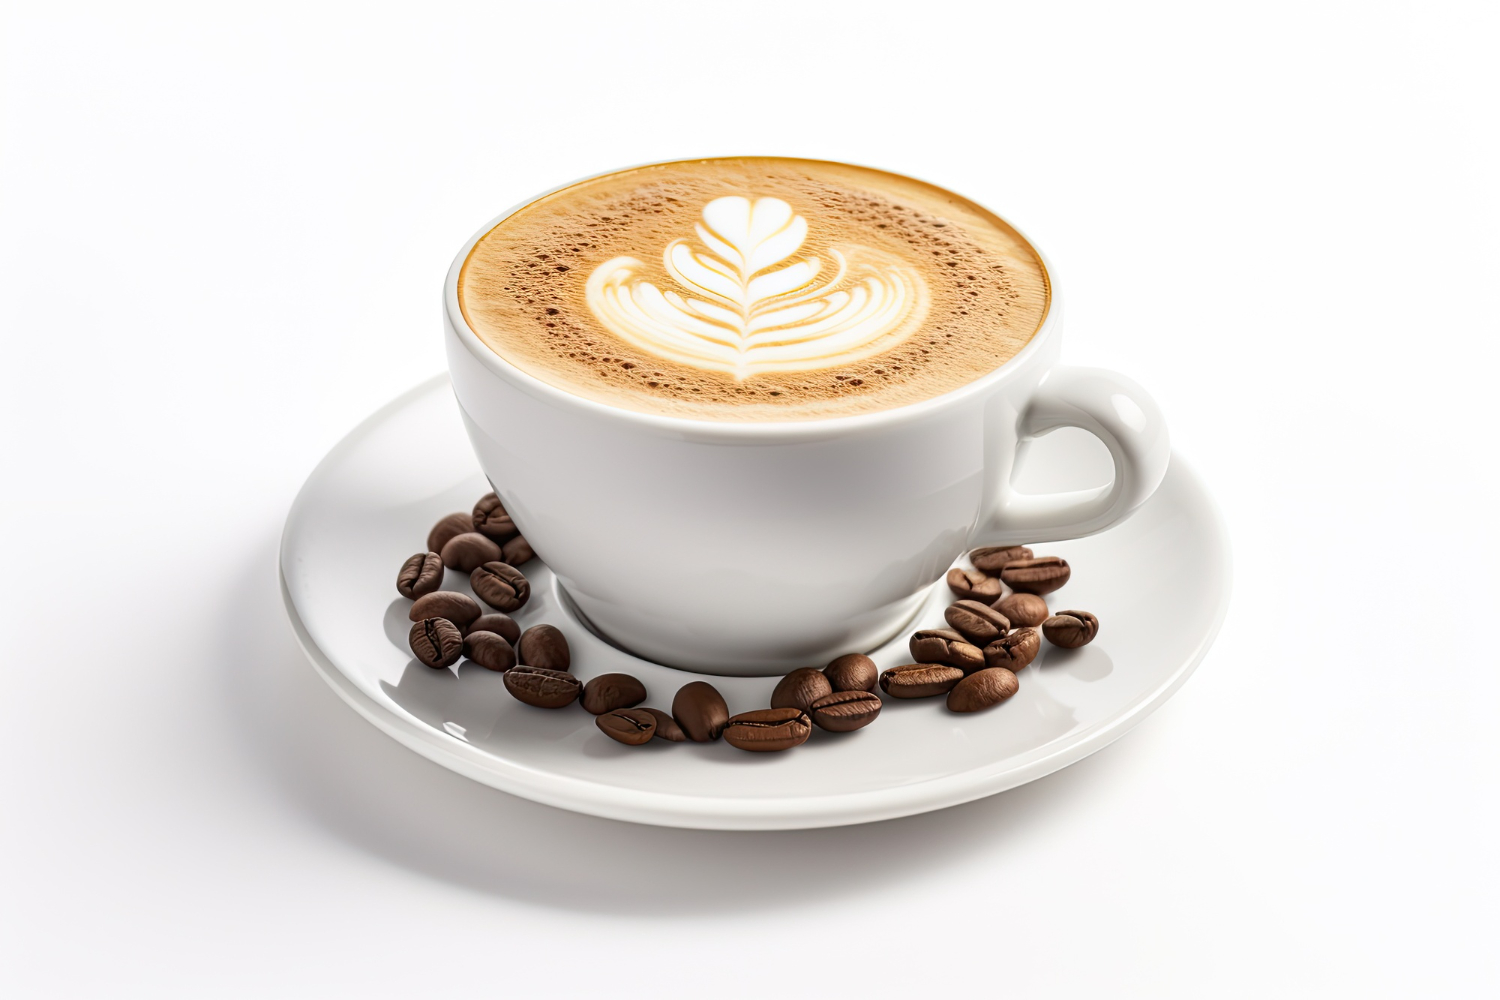

In [5]:
from IPython.display import Image
Image(filename='/kaggle/input/mobilenet-samples/2150691273.jpg', width=300, height=200)

In [6]:
preprocessed_image = prepare_image('/kaggle/input/mobilenet-samples/2150691273.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 0us/step


[[('n07920052', 'espresso', 0.99178547),
  ('n07930864', 'cup', 0.0058993744),
  ('n07932039', 'eggnog', 0.0014171413),
  ('n03063599', 'coffee_mug', 0.0006431493),
  ('n03063689', 'coffeepot', 5.1608342e-05)]]

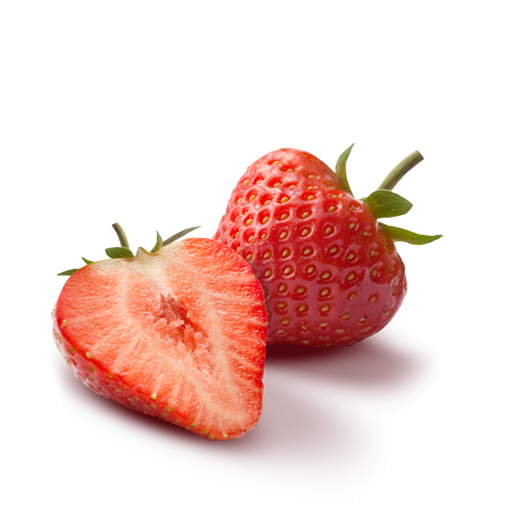

In [7]:
Image(filename='/kaggle/input/mobilenet-samples/strawberry-14985.png', width=300, height=200)